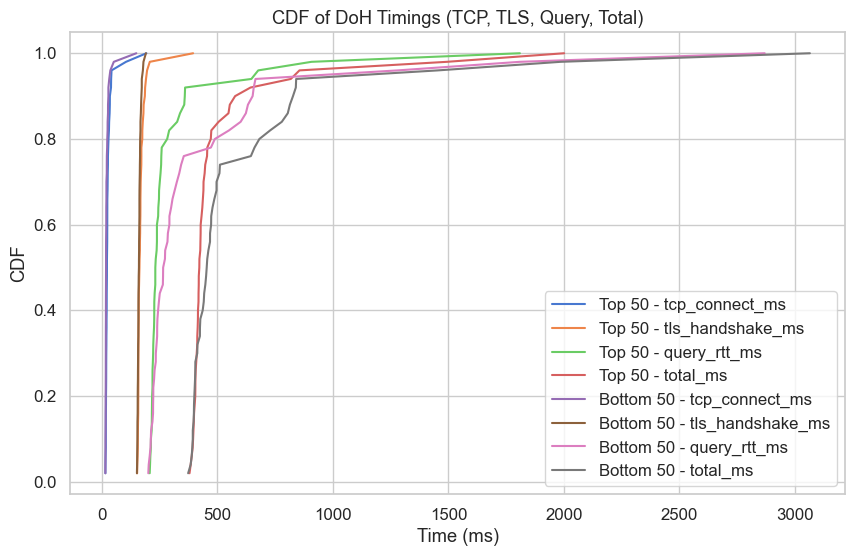

/var/folders/55/_kpfspls6xq0pzzm_dl4ylxc0000gn/T/ipykernel_83107/1680783952.py:45: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, patch_artist=True,


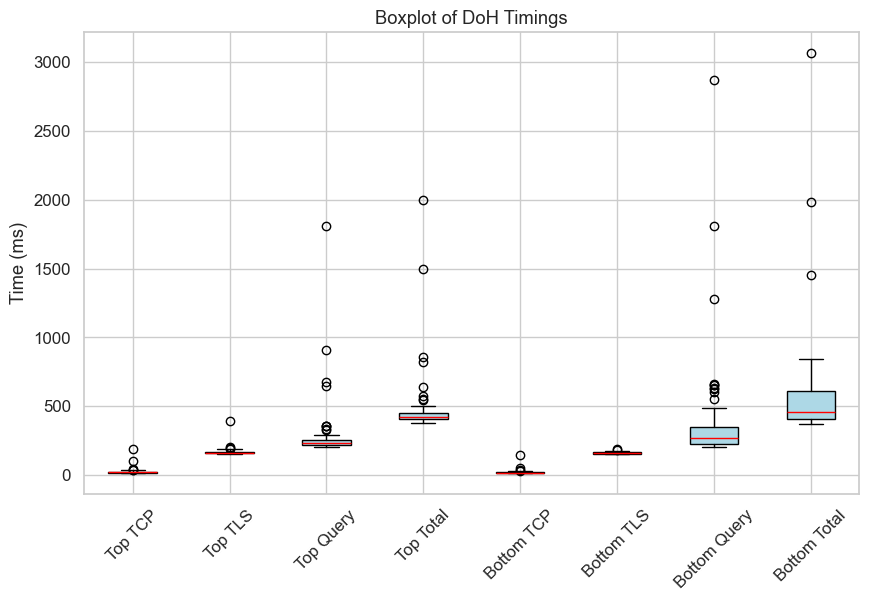

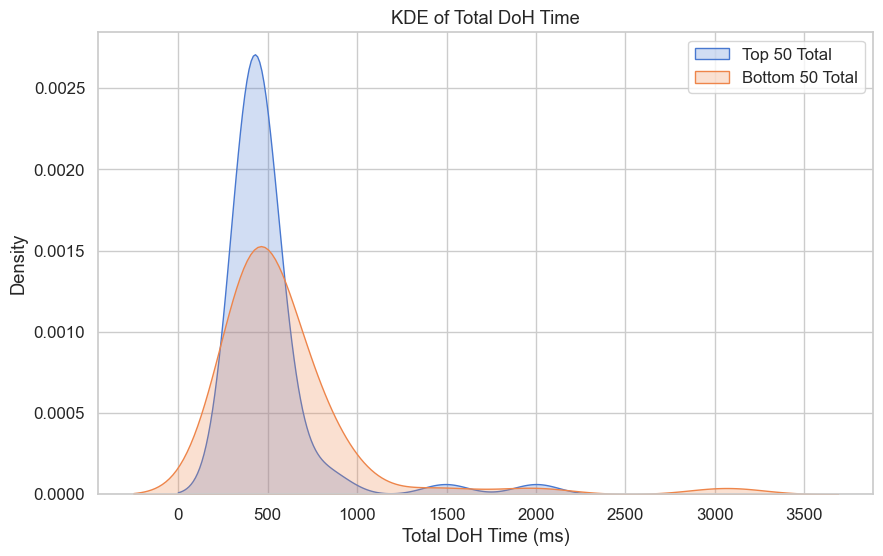

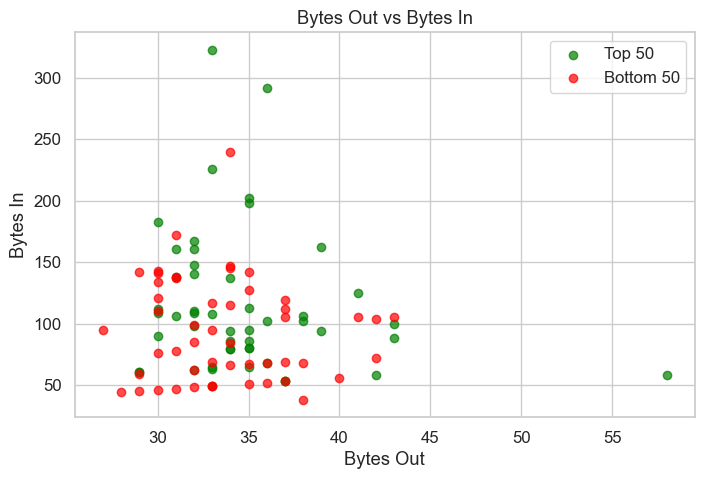

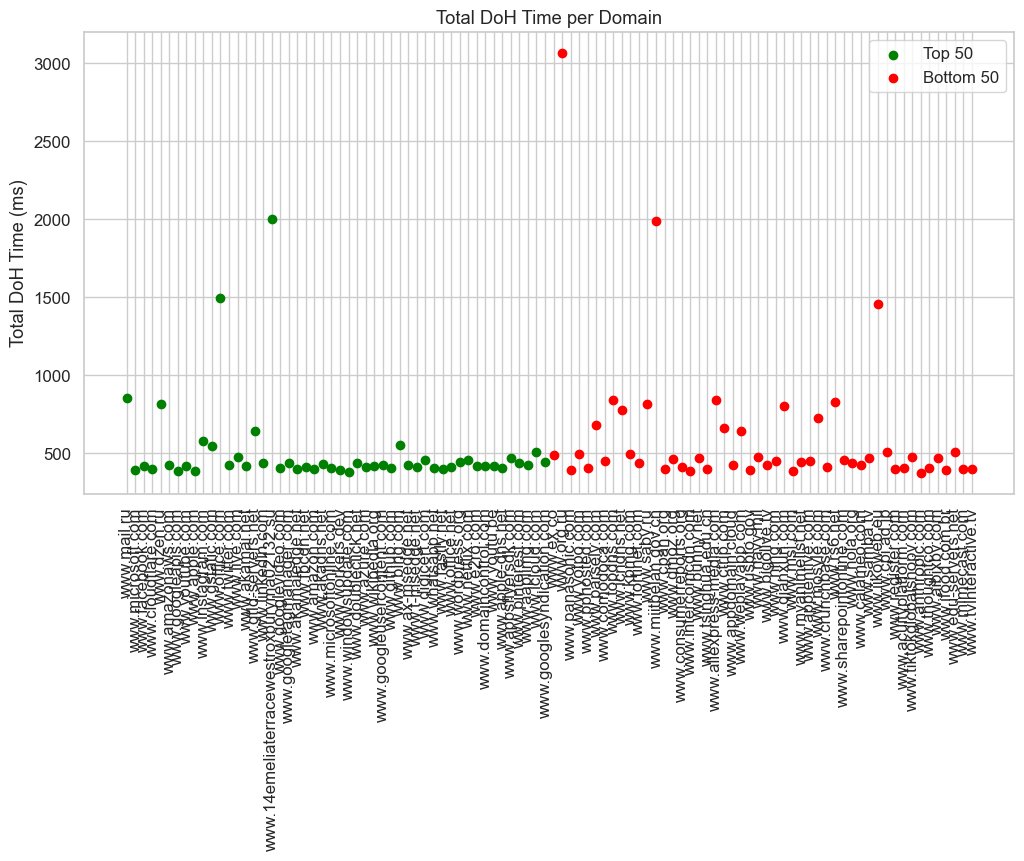

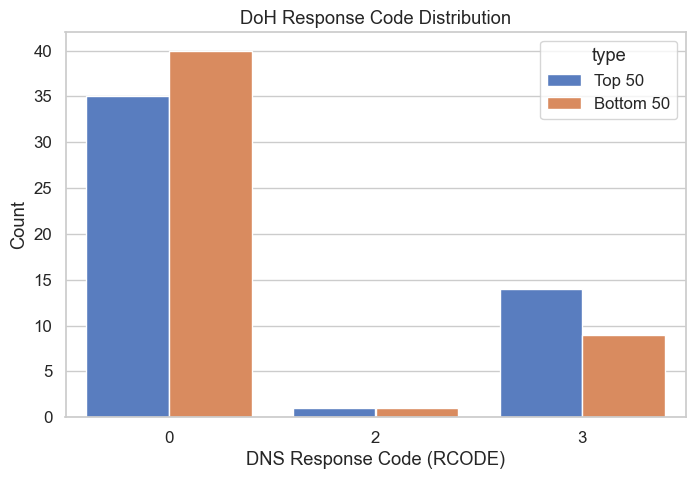

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for better plots
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

path_top50 = "/Users/tejasmacipad/Desktop/final_CN_project/CN_Project/Report/DoH/dns_google_dot_top50.csv"
path_bottom50 = "/Users/tejasmacipad/Desktop/final_CN_project/CN_Project/Report/DoH/dns_google_dot_bot50.csv"

# ---------- Load CSV ----------
df_top50 = pd.read_csv(path_top50)
df_bottom50 = pd.read_csv(path_bottom50)

# ---------- Create total DoH time ----------
df_top50['total_ms'] = df_top50['tcp_connect_ms'] + df_top50['tls_handshake_ms'] + df_top50['query_rtt_ms']
df_bottom50['total_ms'] = df_bottom50['tcp_connect_ms'] + df_bottom50['tls_handshake_ms'] + df_bottom50['query_rtt_ms']

# ---------- Set seaborn style ----------
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# ---------- 1️⃣ CDF of TCP, TLS, Query, Total ----------
def plot_cdf(df, label):
    for col in ['tcp_connect_ms', 'tls_handshake_ms', 'query_rtt_ms', 'total_ms']:
        sorted_data = np.sort(df[col])
        yvals = np.arange(1, len(sorted_data)+1) / len(sorted_data)
        plt.plot(sorted_data, yvals, label=f"{label} - {col}")

plt.figure(figsize=(10,6))
plot_cdf(df_top50, "Top 50")
plot_cdf(df_bottom50, "Bottom 50")
plt.xlabel("Time (ms)")
plt.ylabel("CDF")
plt.title("CDF of DoH Timings (TCP, TLS, Query, Total)")
plt.legend()
plt.grid(True)
plt.show()

# ---------- 2️⃣ Boxplot ----------
plt.figure(figsize=(10,6))
data = [df_top50['tcp_connect_ms'], df_top50['tls_handshake_ms'], df_top50['query_rtt_ms'], df_top50['total_ms'],
        df_bottom50['tcp_connect_ms'], df_bottom50['tls_handshake_ms'], df_bottom50['query_rtt_ms'], df_bottom50['total_ms']]
labels = ['Top TCP','Top TLS','Top Query','Top Total','Bottom TCP','Bottom TLS','Bottom Query','Bottom Total']
plt.boxplot(data, labels=labels, patch_artist=True,
            boxprops=dict(facecolor="lightblue"), medianprops=dict(color="red"))
plt.ylabel("Time (ms)")
plt.title("Boxplot of DoH Timings")
plt.xticks(rotation=45)
plt.show()

# ---------- 3️⃣ Histogram / KDE ----------
plt.figure(figsize=(10,6))
sns.kdeplot(df_top50['total_ms'], fill=True, label="Top 50 Total")
sns.kdeplot(df_bottom50['total_ms'], fill=True, label="Bottom 50 Total")
plt.xlabel("Total DoH Time (ms)")
plt.ylabel("Density")
plt.title("KDE of Total DoH Time")
plt.legend()
plt.show()

# ---------- 4️⃣ Bytes Out vs Bytes In ----------
plt.figure(figsize=(8,5))
plt.scatter(df_top50['bytes_out'], df_top50['bytes_in'], label='Top 50', alpha=0.7, color='green')
plt.scatter(df_bottom50['bytes_out'], df_bottom50['bytes_in'], label='Bottom 50', alpha=0.7, color='red')
plt.xlabel("Bytes Out")
plt.ylabel("Bytes In")
plt.title("Bytes Out vs Bytes In")
plt.legend()
plt.grid(True)
plt.show()

# ---------- 5️⃣ Total DoH Time per Domain ----------
plt.figure(figsize=(12,6))
plt.scatter(df_top50['domain'], df_top50['total_ms'], label='Top 50', color='green')
plt.scatter(df_bottom50['domain'], df_bottom50['total_ms'], label='Bottom 50', color='red')
plt.xticks(rotation=90)
plt.ylabel("Total DoH Time (ms)")
plt.title("Total DoH Time per Domain")
plt.legend()
plt.grid(True)
plt.show()

# ---------- 6️⃣ DNS Response Code Distribution ----------
df_top50['type'] = 'Top 50'
df_bottom50['type'] = 'Bottom 50'
df_combined = pd.concat([df_top50, df_bottom50])

plt.figure(figsize=(8,5))
sns.countplot(x='rcode', hue='type', data=df_combined)
plt.xlabel("DNS Response Code (RCODE)")
plt.ylabel("Count")
plt.title("DoH Response Code Distribution")
plt.show()

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for publication-quality plots
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# ===========================
# Paths to CSVs
# ===========================
path_top50 = "/Users/tejasmacipad/Desktop/final_CN_project/CN_Project/Report/DoH/dns_google_doh2.csv"
path_bottom50 = "/Users/tejasmacipad/Desktop/final_CN_project/CN_Project/Report/DoH/dns_google_doh.csv"

# Load CSVs
df_top50 = pd.read_csv(path_top50)
df_bottom50 = pd.read_csv(path_bottom50)

# If necessary, fill NaN with 0
for df in [df_top50, df_bottom50]:
    df['total_ms'] = df['total_ms'].fillna(0)
    df['bytes_out'] = df['bytes_out'].fillna(0)
    df['bytes_in'] = df['bytes_in'].fillna(0)

# ===========================
# 1️⃣ CDF of Total DoH Time
# ===========================
def plot_cdf(data, label):
    sorted_data = np.sort(data)
    yvals = np.arange(1, len(sorted_data)+1) / len(sorted_data)
    plt.plot(sorted_data, yvals, label=label, linewidth=2)

plt.figure(figsize=(8,5))
plot_cdf(df_top50['total_ms'], 'Top 50 Total Time')
plot_cdf(df_bottom50['total_ms'], 'Bottom 50 Total Time')
plt.xlabel("Total DoH Time (ms)")
plt.ylabel("CDF")
plt.title("CDF of Total DoH Time: Top 50 vs Bottom 50")
plt.grid(True)
plt.legend()
plt.show()

# ===========================
# 2️⃣ Boxplot of Total DoH Time
# ===========================
plt.figure(figsize=(8,5))
data = [df_top50['total_ms'], df_bottom50['total_ms']]
plt.boxplot(data, labels=['Top 50', 'Bottom 50'], patch_artist=True,
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"))
plt.ylabel("Total DoH Time (ms)")
plt.title("Boxplot: Total DoH Time (Top 50 vs Bottom 50)")
plt.show()

# ===========================
# 3️⃣ KDE / Histogram of Total DoH Time
# ===========================
plt.figure(figsize=(8,5))
sns.kdeplot(df_top50['total_ms'], label='Top 50', fill=True)
sns.kdeplot(df_bottom50['total_ms'], label='Bottom 50', fill=True)
plt.xlabel("Total DoH Time (ms)")
plt.ylabel("Density")
plt.title("KDE of Total DoH Time")
plt.legend()
plt.show()

# ===========================
# 4️⃣ Bytes Out vs Bytes In Scatter
# ===========================
plt.figure(figsize=(8,5))
plt.scatter(df_top50['bytes_out'], df_top50['bytes_in'], label='Top 50', alpha=0.7, color='green')
plt.scatter(df_bottom50['bytes_out'], df_bottom50['bytes_in'], label='Bottom 50', alpha=0.7, color='red')
plt.xlabel("Bytes Out")
plt.ylabel("Bytes In")
plt.title("Bytes Out vs Bytes In: Top 50 vs Bottom 50 (DoH)")
plt.legend()
plt.grid(True)
plt.show()

# ===========================
# 5️⃣ Total DoH Time vs Domain Scatter
# ===========================
plt.figure(figsize=(12,6))
plt.scatter(df_top50['domain'], df_top50['total_ms'], label='Top 50', color='green')
plt.scatter(df_bottom50['domain'], df_bottom50['total_ms'], label='Bottom 50', color='red')
plt.xticks(rotation=90)
plt.ylabel("Total DoH Time (ms)")
plt.title("Total DoH Time per Domain")
plt.legend()
plt.grid(True)
plt.show()

# ===========================
# 6️⃣ DNS Response Code Distribution
# ===========================
df_top50['type'] = 'Top 50'
df_bottom50['type'] = 'Bottom 50'
df_combined = pd.concat([df_top50, df_bottom50])

plt.figure(figsize=(8,5))
sns.countplot(x='rcode', hue='type', data=df_combined)
plt.xlabel("DNS Response Code (RCODE)")
plt.ylabel("Count")
plt.title("DoH Response Code Distribution: Top 50 vs Bottom 50")
plt.show()

KeyError: 'total_ms'

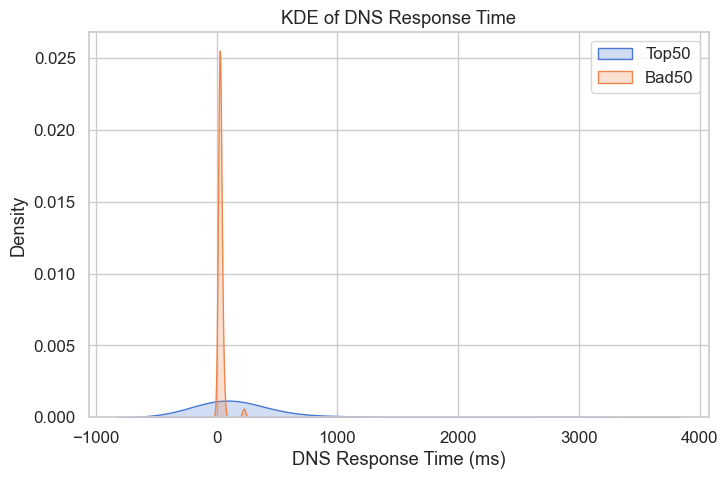

In [15]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.kdeplot(df_good['rtt_ms'], label='Top50', fill=True)
sns.kdeplot(df_bad['rtt_ms'], label='Bad50', fill=True)
plt.xlabel("DNS Response Time (ms)")
plt.ylabel("Density")
plt.title("KDE of DNS Response Time")
plt.legend()
plt.show()

## Refined Code

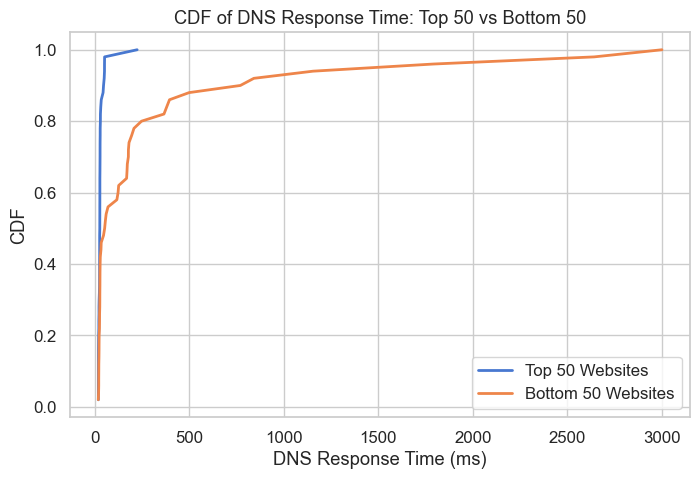

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for better plots
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Paths to CSVs
path_top50 = "/Users/tejasmacipad/Desktop/CN/FinalProject/CN_Project/Report/Direct_query/dns_cf_do53_top.csv"
path_bottom50 = "/Users/tejasmacipad/Desktop/CN/FinalProject/CN_Project/Report/Direct_query/dns_cf_do53.csv"

# Load CSVs
df_top50 = pd.read_csv(path_top50)
df_bottom50 = pd.read_csv(path_bottom50)

# ==============================
# 1️⃣ CDF of DNS Response Time
# ==============================
def plot_cdf(data, label):
    sorted_data = np.sort(data)
    yvals = np.arange(1, len(sorted_data)+1) / len(sorted_data)
    plt.plot(sorted_data, yvals, label=label, linewidth=2)

plt.figure(figsize=(8,5))
plot_cdf(df_top50['rtt_ms'], 'Top 50 Websites')
plot_cdf(df_bottom50['rtt_ms'], 'Bottom 50 Websites')
plt.xlabel("DNS Response Time (ms)")
plt.ylabel("CDF")
plt.title("CDF of DNS Response Time: Top 50 vs Bottom 50")
plt.grid(True)
plt.legend()
plt.show()


/var/folders/55/_kpfspls6xq0pzzm_dl4ylxc0000gn/T/ipykernel_75968/3401869459.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['Top 50', 'Bottom 50'], patch_artist=True,


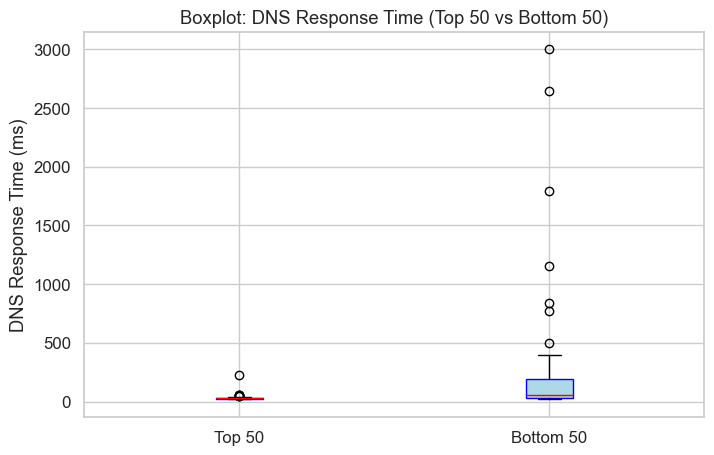

In [9]:

# ==============================
# 2️⃣ Boxplot of DNS Response Time
# ==============================
plt.figure(figsize=(8,5))
data = [df_top50['rtt_ms'], df_bottom50['rtt_ms']]
plt.boxplot(data, labels=['Top 50', 'Bottom 50'], patch_artist=True,
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"))
plt.ylabel("DNS Response Time (ms)")
plt.title("Boxplot: DNS Response Time (Top 50 vs Bottom 50)")
plt.show()

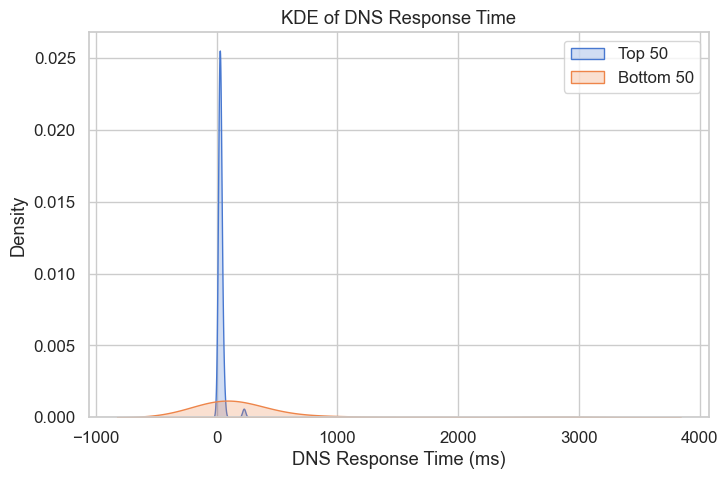

In [10]:

# ==============================
# 3️⃣ KDE / Histogram of DNS Response Time
# ==============================
plt.figure(figsize=(8,5))
sns.kdeplot(df_top50['rtt_ms'], label='Top 50', fill=True)
sns.kdeplot(df_bottom50['rtt_ms'], label='Bottom 50', fill=True)
plt.xlabel("DNS Response Time (ms)")
plt.ylabel("Density")
plt.title("KDE of DNS Response Time")
plt.legend()
plt.show()


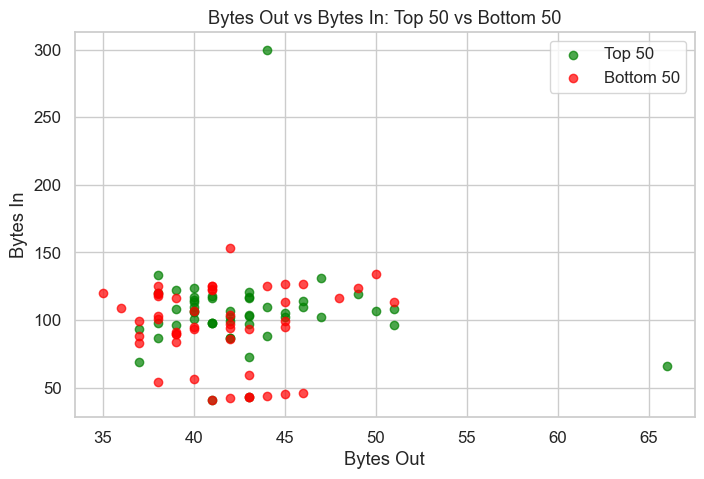

In [11]:

# ==============================
# 4️⃣ Bytes Out vs Bytes In Scatter
# ==============================
plt.figure(figsize=(8,5))
plt.scatter(df_top50['bytes_out'], df_top50['bytes_in'], label='Top 50', alpha=0.7, color='green')
plt.scatter(df_bottom50['bytes_out'], df_bottom50['bytes_in'], label='Bottom 50', alpha=0.7, color='red')
plt.xlabel("Bytes Out")
plt.ylabel("Bytes In")
plt.title("Bytes Out vs Bytes In: Top 50 vs Bottom 50")
plt.legend()
plt.grid(True)
plt.show()


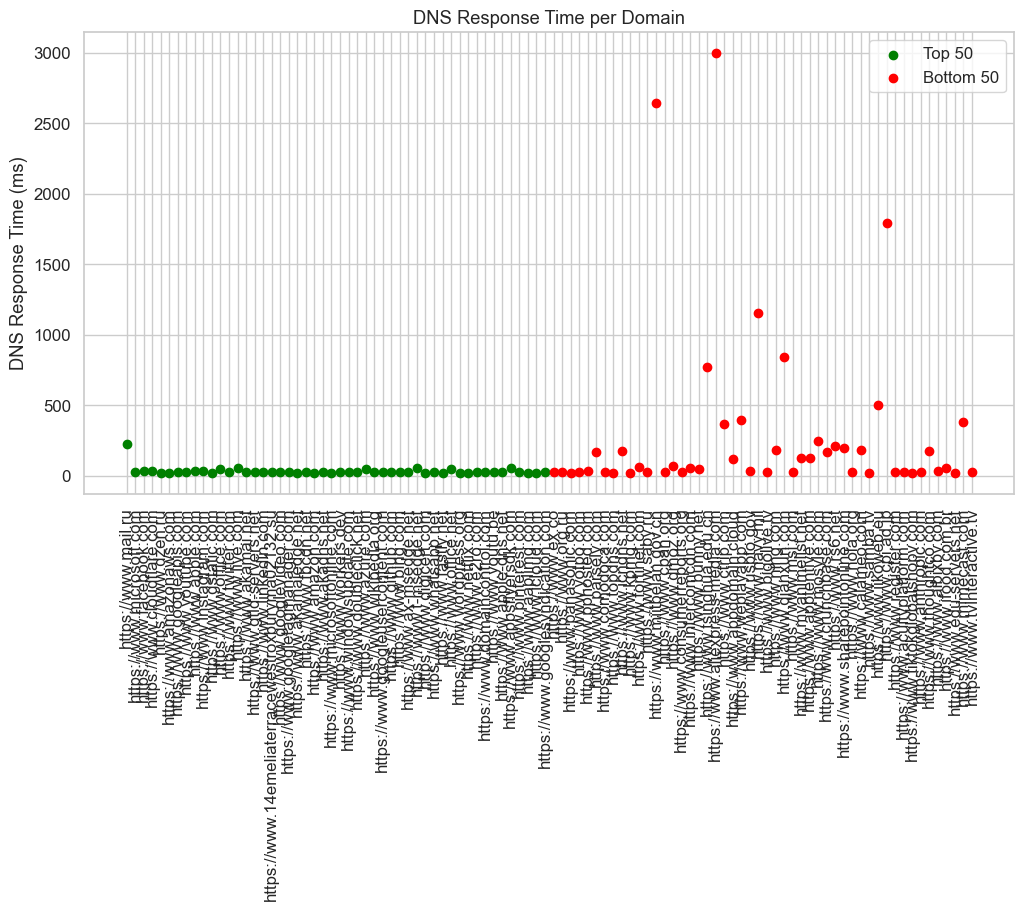

In [12]:

# ==============================
# 5️⃣ RTT vs Domain Scatter
# ==============================
plt.figure(figsize=(12,6))
plt.scatter(df_top50['domain'], df_top50['rtt_ms'], label='Top 50', color='green')
plt.scatter(df_bottom50['domain'], df_bottom50['rtt_ms'], label='Bottom 50', color='red')
plt.xticks(rotation=90)
plt.ylabel("DNS Response Time (ms)")
plt.title("DNS Response Time per Domain")
plt.legend()
plt.grid(True)
plt.show()


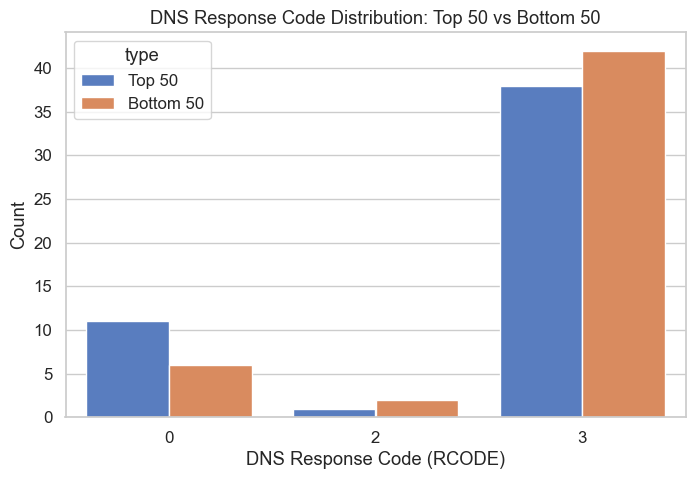

In [13]:

# ==============================
# 6️⃣ DNS Response Code Distribution
# ==============================
df_top50['type'] = 'Top 50'
df_bottom50['type'] = 'Bottom 50'
df_combined = pd.concat([df_top50, df_bottom50])

plt.figure(figsize=(8,5))
sns.countplot(x='rcode', hue='type', data=df_combined)
plt.xlabel("DNS Response Code (RCODE)")
plt.ylabel("Count")
plt.title("DNS Response Code Distribution: Top 50 vs Bottom 50")
plt.show()